# **Project - Convolutional Neural Networks: Street View Housing Number Digit Recognition**

# Marks: 30

Welcome to the project on classification using Convolutional Neural Networks. We will continue to work with the Street View Housing Numbers (SVHN) image dataset for this project.

--------------
### **Context:** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
### **Objective:**
----------------

Build a CNN model that can identify the digits in the images.

-------------
### **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been done.

## **Mount the drive**
Let us start by mounting the drive and importing the necessary libraries.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical

Let us check for the version of TensorFlow.

In [3]:
print(tf.__version__)

2.7.0


## **Load the dataset**
- Let us now load the dataset that is available as a .h5 file.
- Split the data into train and the test dataset

In [4]:
import h5py

# Open the file as read only
# User can make changes in the path as required
h5f = h5py.File('/content/drive/MyDrive/SVHN_single_grey1.h5', 'r')

# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


# Close this file
h5f.close()

Let's check the number of images in the training and testing data.

In [5]:
len(X_train), len(X_test)

(42000, 18000)

**Observations**
- There are 42,000 images in the training data and 18,000 images in the testing data. 

## **Visualizing images**
- Use X_train to visualize the first 10 images
- Use Y_train to print the first 10 labels

#### **Question 1: Complete the below code to visualize the first 10 images from the training data (1 Mark)**

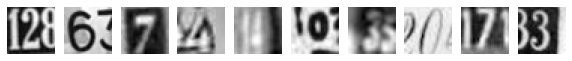

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# visualizing the first 10 images in the dataset and their labels
plt.figure(figsize=(10, 1))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray") # write the function to visualize images
    plt.axis('off')

plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Data Preparation**

- Print the first image in the train image and figure out the shape of the images
- Reshape the train and the test dataset to make them fit the first convolutional operation that we will create later. Figure out the required shape
- Normalize the train and the test dataset by dividing by 255
- Print the new shapes of the train and the test set
- One-hot encode the target variable

In [7]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print()
print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [8]:
# Reshaping the dataset to flatten them. Remember that we always have to give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [9]:
# Normalize inputs from 0-255 to 0-1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
# New shape 

print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


#### **Question 2: One-hot encode the labels in the target variable y_train and y_test (2 Marks)**

In [11]:
#Write the function and appropriate variable name to one-hot encode the output

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#test labels
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

- Notice that each entry of y_test is a one-hot encoded vector instead of a single label.

## **Model Building**

Now, we have done data preprocessing, let's build a CNN model.

In [12]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 32, verbose = 1, and 20 epochs**. Store the model building history to use later for visualization.

#### **Question 3: Build and train a CNN model as per the above mentioned architecture (10 Marks)**

In [13]:
#Importing losses and optimizers modules
from tensorflow.keras import losses
from tensorflow.keras import optimizers

#Define the function
def cnn_model_1():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))
    model.add(Dense(10, activation='softmax'))


    #declare adam optimizer with learning rate of 0.001 
    adam = optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

In [14]:
#Build the model
model_1 = cnn_model_1()

In [15]:
#Print the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [16]:
# Fit the model
history_model_1 = model_1.fit(X_train, y_train, validation_split=0.2, 
                    epochs=20, 
                    batch_size=32,
                    verbose=1)

Epoch 1/20
1050/1050 [==============================] - 20s 11ms/step - loss: 1.2032 - accuracy: 0.6000 - val_loss: 0.6537 - val_accuracy: 0.8095
Epoch 2/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.5316 - accuracy: 0.8462 - val_loss: 0.4988 - val_accuracy: 0.8620
Epoch 3/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.4360 - accuracy: 0.8725 - val_loss: 0.4959 - val_accuracy: 0.8592
Epoch 4/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3817 - accuracy: 0.8881 - val_loss: 0.4458 - val_accuracy: 0.8764
Epoch 5/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.3371 - accuracy: 0.9000 - val_loss: 0.4435 - val_accuracy: 0.8742
Epoch 6/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2999 - accuracy: 0.9122 - val_loss: 0.4637 - val_accuracy: 0.8714
Epoch 7/20
1050/1050 [==============================] - 10s 10ms/step - loss: 0.2695 - accuracy: 0.9194 - val_loss: 0.4501 -

### **Plotting the validation and training accuracies**

#### **Question 4: Write your observations on the below plot (2 Marks)**

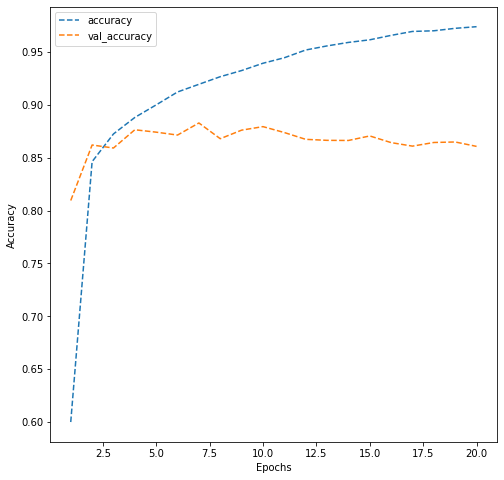

In [17]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations: 
- (Please note: due to some random nature the plot come out slightly differently everytime you run the code, however, there doesn't seem to be any error given the slight random differences and the overall conclusion is the same.)
- As seen from the figure, the model performs poorly on the validation data set. The model seems to be overfitting the training data set to a great extent. 
- The validation accuracy plateaus after 2 or 3 epochs and it then fluctuates around 86%. 
- The validation accuracy however, has increased from the NN model without Convolution and Max-pulling of the previous projects.
- This indicates the importance of filtering operation prior to flattening and NN modeling. 
**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the keras backend. Also, let's fix the seed again after clearing the backend.

In [18]:
#Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [19]:
#Fixing the seed for random number generators
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture
 - First Convolutional layer with **16 filters and kernel size of 3x3**. Use the **'same' padding** and provide an **apt input shape**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with slope equal to 0.1**
 - Add a **dropout layer with rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes** and **softmax activation**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and accuracy metric**. Do not fit the model here, just return the compiled model
- Call the function and store the model in a new variable
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs**. Store the model building history to use later for visualization.

#### **Question 5: Build and train the second CNN model as per the above mentioned architecture (10 Marks)**

In [20]:
#Define the function
def cnn_model_2():
    model = Sequential() 
    #Add layers as per the architecture mentioned above in the same sequence
    
#First Convolutional layer with 16 filters and kernel size of 3x3. Use the 'same' padding and provide an apt input shape Add a LeakyRelu layer .1
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

#Second Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding, LeakyRelu with the slope equal to 0.1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))

#max-pooling layer with a pool size of 2x2
    model.add(MaxPool2D(pool_size=(2, 2)))

#BatchNormalization layer
    model.add(BatchNormalization())

#third Convolutional layer with 32 filters and kernel size of 3x3 with 'same' padding LeakyRelu layer with slope equal to 0.1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
    model.add(LeakyReLU(0.1))

#Fourth Convolutional layer 64 filters and kernel size of 3x3 with 'same' padding LeakyRelu layer with slope equal to 0.1
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(LeakyReLU(0.1))

#max-pooling layer with a pool size of 2x2    
    model.add(MaxPool2D(pool_size=(2, 2)))
 
#BatchNormalization layer
    model.add(BatchNormalization())

#Flatten the output from the previous layer
    model.add(Flatten())

#dense layer with 32 nodes, LeakyRelu layer with slope equal to 0.1
    model.add(Dense(32))
    model.add(LeakyReLU(0.1))

#dropout layer with rate equal to 0.5
    model.add(Dropout(0.5))

#final output layer with nodes equal to the number of classes and softmax activation
    model.add(Dense(10, activation='softmax'))


    #declare adam optimizer with learning rate of 0.001 
    adam2 = optimizers.Adam(learning_rate=0.001)
    
    #compile the model
    model.compile(optimizer=adam2, loss="categorical_crossentropy", metrics=["accuracy"])

    
    return model

In [21]:
# Build the model
model_2 = cnn_model_2()

In [22]:
#Print the summary
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                          

In [23]:
# Fit the model
#Fit the model on the train data with a validation split of 0.2, batch size = 128, verbose = 1, and 30 epochs. Store the model building

history_model_2 = model_2.fit(X_train, y_train, validation_split=0.2, 
                    epochs=30, 
                    batch_size=128,
                    verbose=1)

Epoch 1/30
263/263 [==============================] - 7s 23ms/step - loss: 1.4616 - accuracy: 0.5007 - val_loss: 2.6379 - val_accuracy: 0.2126
Epoch 2/30
263/263 [==============================] - 6s 22ms/step - loss: 0.6937 - accuracy: 0.7847 - val_loss: 0.6416 - val_accuracy: 0.8154
Epoch 3/30
263/263 [==============================] - 6s 22ms/step - loss: 0.5600 - accuracy: 0.8281 - val_loss: 0.4864 - val_accuracy: 0.8561
Epoch 4/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4971 - accuracy: 0.8480 - val_loss: 0.5172 - val_accuracy: 0.8401
Epoch 5/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4466 - accuracy: 0.8642 - val_loss: 0.4125 - val_accuracy: 0.8857
Epoch 6/30
263/263 [==============================] - 6s 22ms/step - loss: 0.4101 - accuracy: 0.8731 - val_loss: 0.4009 - val_accuracy: 0.8900
Epoch 7/30
263/263 [==============================] - 6s 22ms/step - loss: 0.3804 - accuracy: 0.8822 - val_loss: 0.3622 - val_accuracy: 0.8986

### **Plotting the validation and training accuracies**

#### **Question 6: Write your observations on the below plot (2 Marks)**

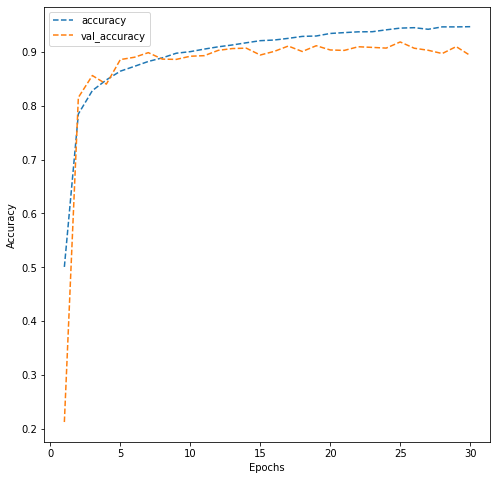

In [24]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

**Observations:
- - (Please note: due to some random nature the plot come out slightly differently everytime you run the code, however, there doesn't seem to be any error given the slight random differences and the overall conclusion is the same.)
- In this second model, the validation accuracy has improved substantially and the problem of overfitting has been reduced to a great degree. 
- The model is giving good generalized performance and there is little difference between training and validation sets. 

## **Predictions on the test data**

- Make predictions on the test set using the second model
- Print the obtained results using the classification report and the confusion matrix
- Final observations from the obtained results

#### **Question 7: Make predictions on the test data using the second model (1 Mark)**

In [25]:
#Make prediction on the test data using model_2 
test_pred = model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis=-1)

**Note:** Earlier, we noticed that each entry of the test data is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [26]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test, axis=-1)

#### **Question 8: Write your final observations on the performance of the model on the test data (2 Marks)**

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1814
           1       0.89      0.91      0.90      1828
           2       0.96      0.88      0.92      1803
           3       0.94      0.81      0.87      1719
           4       0.91      0.91      0.91      1812
           5       0.90      0.90      0.90      1768
           6       0.84      0.92      0.87      1832
           7       0.92      0.92      0.92      1808
           8       0.88      0.85      0.86      1812
           9       0.85      0.90      0.88      1804

    accuracy                           0.89     18000
   macro avg       0.90      0.89      0.89     18000
weighted avg       0.90      0.89      0.89     18000



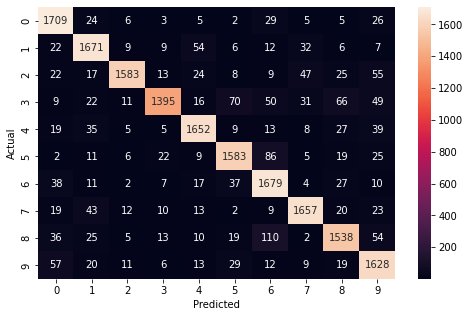

In [27]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, test_pred))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### **Observations:
- - (Please note: due to some random nature the matrix may come out slightly differently everytime you run the code, however, there doesn't seem to be any error given the slight random differences and the overall conclusion is the same.)
- Just like the ANN model, digits 3 and 8 have poor recall rates of 81-84%. This means only 81(4)%  of the digit images were actually classified as same digit. This is consistent with the fact that digits 3 and 8 symbols have rich features including two half-circles. A seen in the matrix, most of the time an actual 3 is taken to be a 5 by the model due to similarity in shape. A lot of the time the actual digit 8 was identified by the model as digit 6 due to similarity.
- Nontheless, this is significant improvement over the ANN model which showed a recall of 69% for digits 3 and 8.
- Digits 0,1,4,6,7 have best recalls of over 90%. This means the model best identifies an actual 0,1,4,6,7.
- The improvement in these later digit identification should be due to the initial filtering and feature extraction prior to flattening and feed-forward NN. This goes to show that applying our knowledge of image processing prior to FFNN encoding pays grear divident. Perhaps inpiration for making more custom-made nn in different applications.  
- The overall accuracy and recal of ~90% is decent given the circumstances these street-view images were taken. 
- Overal, the model has good balance and perfomance.
**